# Hacker Earth Assignment
### Predict Happiness Source

# By: T.Harish Kumar
## Email: harishthadakamadla@gmail.com

# Problem Statement :

Smile DB is a corpus of more than 1,00,000 happy moments crowd sourced via Amazon's Mechanical Truck

Based on the Happy moment ststement you have to predict the category of Happiness that is the source of happiness which is typically either of following :
<li>bonding</li>
<li>achievement</li>
<li>affection</li>
<li>leisure</li>
<li>enjoy_the_moment</li>
<li>nature</li>
<li>exercise</li>

In [81]:
#import necessary libraries.
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt # for plotting diagrams
from sklearn.model_selection import train_test_split

### importing data from csv file  store in data frame.

In [97]:
trdata=pd.read_csv(r'C:\Users\vinay\Hacker Earth\hm_train.csv',encoding = 'unicode_escape')
trdata.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection


Time taken to run this cell : 0:00:00.113744


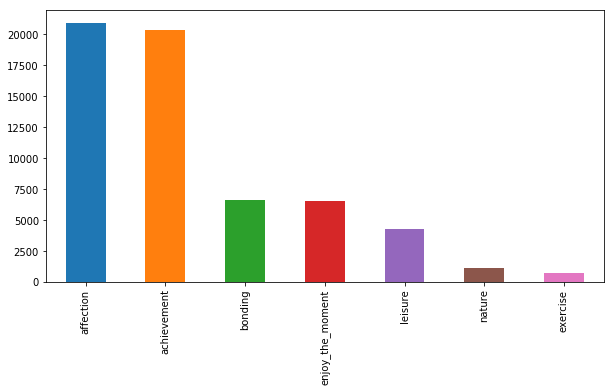

In [98]:
start = datetime.now()
balanced= [trdata['predicted_category'].values]
plt.figure(figsize=(10,5))
trdata.predicted_category.value_counts().plot(kind='bar');
print("Time taken to run this cell :", datetime.now() - start)

### Imbalanced data we can see in the above the diagram.

In [99]:
x=trdata.cleaned_hm
y=trdata.predicted_category

### splitting the data :

In [122]:
from sklearn import cross_validation
X_1, X_test, y_1, y_test = cross_validation.train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.25, random_state=0)
# split the data into Train and Test and cv

 ## Bag of Words applied on data 

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() 
count_vect.fit(X_train)
train_bow    =count_vect.transform(X_train)
cv_bow       =count_vect.transform(X_cv)
# Here we fit transform to the data
cv_bow.get_shape()

(12064, 16586)

In [124]:
test_bow     =count_vect.transform(X_test)
test_bow.get_shape()

(12065, 16586)

## getting the data from the csv file store in Data Frame

In [103]:
tedata=pd.read_csv(r'C:\Users\vinay\Hacker Earth\hm_test.csv',encoding = 'unicode_escape')
x_test_test=tedata.cleaned_hm

In [104]:
tedata.head()

,hmid,reflection_period,cleaned_hm,num_sentence
0,88305,3m,I spent the weekend in Chicago with my friends.,1
1,88306,3m,We moved back into our house after a remodel. ...,2
2,88307,3m,My fiance proposed to me in front of my family...,1
3,88308,3m,I ate lobster at a fancy restaurant with some ...,1
4,88309,3m,I went out to a nice restaurant on a date with...,5


# creating a function naivebayes 

in this function we are finding the optimal alpha value for multinomialNB.
use that alpha value to preditc the test data in the algorithm.

In [133]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import MultinomialNB

def naivebayes(X_train,y_train,X_cv,y_cv,X_test,y_test,Vectorization,):
    lb= LabelBinarizer()
    y_train=np.array([number[0] for number in lb.fit_transform(y_train)])
    y_test=np.array([number[0] for number in lb.fit_transform(y_test)])
    alpha1=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
    cv_scores=[]
    for optimal_alpha in alpha1:
        NB=MultinomialNB(alpha=optimal_alpha)
        scores = cross_val_score(NB,X_train, y_train, cv=10, scoring='f1')
        cv_scores.append(scores.mean())
    MSE = [1 - x for x in cv_scores]  #miss classification error
    # determining best k
    optimal_k = alpha1[MSE.index(min(MSE))]
    #print('\nThe optimal number of neighbors is %d.' % optimal_k)    
    print(X_test.shape)   
    print(X_train.shape)
    good_NB = MultinomialNB(alpha=optimal_k)
    # fitting the model
    good_NB.fit(X_train, y_train)

    predict=good_NB.predict(X_test)
    acc = accuracy_score(y_test, predict) * 100
    score=good_NB.score(X_test, y_test)
    print('The accuracy of NaiveBayes for alpha =%f is %f%%' % (optimal_k, acc))
    print('\n')
    print('f1 score for NB algorithm with alpha =',optimal_k,' is ' , np.round((f1_score(y_test, predict,average= 'macro')*100),decimals = 2))
    print('\n')
    print('Precision for NB algorithm with aplha =',optimal_alpha,' is ' , np.round((precision_score(y_test, predict,average= 'macro')*100),decimals = 2))
    print('\n')
    from sklearn import metrics
    fpr, tpr, _ = metrics.roc_curve(y_test, predict)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    cm = confusion_matrix(y_test, predict)
    
    print(y_test.shape)
    print(predict.shape)
    class_label = ["negative", "positive"]
    df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
    sns.heatmap(df_cm, annot = True, fmt = "d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    
    return good_NB

calling the naivebayes function with the arguments

(12065, 16586)
(36192, 16586)
The accuracy of NaiveBayes for alpha =1.000000 is 90.352259%


f1 score for NB algorithm with alpha = 1  is  88.97


Precision for NB algorithm with aplha = 10000  is  89.3




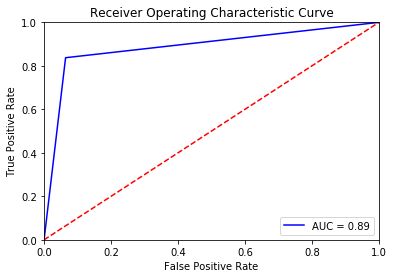

(12065,)
(12065,)


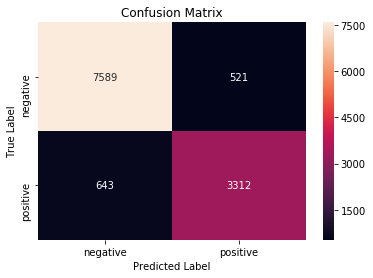

In [134]:
NBbow=naivebayes(train_bow,y_train,cv_bow,y_cv,test_bow,y_test,'Bag of Words')

#### we have got the accuracy 90% with the  hyper parameter 1
#### we have got F1 Score  89% with the  hyper parameter 1

so we have use that hyper parameter for the predicton on test data.

### we got auc curve=0.89  its above the 0.50 it denotes that classifier is good classifier.

# TFIDF applied on data

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2)) #,min_df=10,max_df=300)
train_tfidf    =tf_idf_vect.fit_transform(X_train)
cv_tfidf       =tf_idf_vect.transform(X_cv)
train_tfidf.get_shape()

(36192, 178307)

In [141]:
test_tfidf  =tf_idf_vect.transform(X_test)
test_tfidf.get_shape()

(12065, 178307)

(12065, 178307)
(36192, 178307)
The accuracy of NaiveBayes for alpha =0.100000 is 89.564857%


f1 score for NB algorithm with alpha = 0.1  is  87.73


Precision for NB algorithm with aplha = 10000  is  89.44




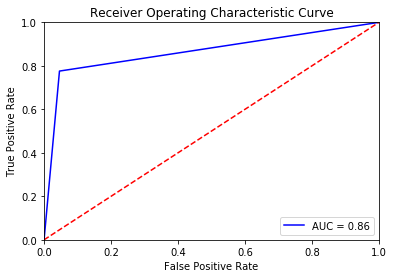

(12065,)
(12065,)


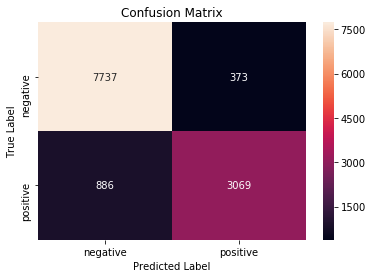

Wall time: 10 s


In [144]:
%%time
#tfidf=naivebayes(train_bow,y_train,cv_bow,y_cv,test_bow,y_test,'Bag of Words')
NBtfidf=naivebayes(train_tfidf,y_train,cv_tfidf,y_cv,test_tfidf,y_test,'tfidf')

### f1 score we have got 86% 
### bow f1 score  and accuracy is more than tfidf  so we have to impliment  the model with naive bayes bow vectorization model.

In [154]:
x_train=trdata.cleaned_hm
y_train=trdata.predicted_category

In [155]:
x_test=tedata.cleaned_hm

In [156]:
start = datetime.now()
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.metrics import classification_report

naivebayes=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer())
                     ,('clf',MultinomialNB(alpha=1)),])
naivebayes.fit(x_train,y_train)
y_pred=naivebayes.predict(x_test)

print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:04.534794


In [ ]:
tedata.insert(3,"Predict",y_pred,True)

In [179]:
tedata[15000:15010]

,hmid,reflection_period,cleaned_hm,Predict,num_sentence
35837,124364,24h,I made new friends yesterday when I met old co...,bonding,1
35838,124365,24h,I was at the grocery store and saw a very old ...,affection,1
35839,124366,24h,"about a month ago, I got in touch with an old ...",bonding,1
35840,124367,24h,I weighed myself and verified I was losing wei...,achievement,1
35841,124368,24h,It was my son's birthday and we had a party fo...,affection,1
35842,124369,24h,"I found 10 dollars in my old jeans, I thought ...",achievement,1
35843,124370,24h,"I attended a ""meet up"" event at a Chinese rest...",affection,2
35844,124371,24h,my wife has been out of town for the whole wee...,affection,3
35845,124372,24h,I made my favorite pasta salad for dinner.\r\r\n,enjoy_the_moment,1
35846,124373,24h,My daughter went to bed without a fuss. She u...,affection,3


In [163]:
tedata[40000:40010]

,hmid,reflection_period,cleaned_hm,Predict,num_sentence
40000,128552,24h,Purchasing and playing a new video game.,achievement,1
40001,128553,24h,I called my mother to let her know that we are...,affection,1
40002,128554,24h,"My happiest moment on yesterday, My brother pu...",achievement,3
40003,128555,24h,I took a half day at work and was able to spen...,affection,1
40004,128556,24h,I scored well in my Astronomy test.,achievement,1
40005,128557,24h,I am happy that I was able to refinance my car...,achievement,1
40006,128558,24h,Eating a few candies,achievement,1
40007,128559,24h,"I got a new playstation 4, I got the Pro versi...",achievement,1
40008,128560,24h,My son is off to Cedar Point for the 8th grade...,affection,3
40009,128561,24h,I got to snuggle with a dog,affection,1


### After Predicting the test data store in data frame with column name ='Predict'

,hmid,reflection_period,cleaned_hm,Predict,num_sentence
0,88305,3m,I spent the weekend in Chicago with my friends.,affection,1
1,88306,3m,We moved back into our house after a remodel. ...,affection,2
2,88307,3m,My fiance proposed to me in front of my family...,affection,1
3,88308,3m,I ate lobster at a fancy restaurant with some ...,affection,1
4,88309,3m,I went out to a nice restaurant on a date with...,affection,5


###  hmid, Predicted Category of Happiness with reflection time 24h  stored in Xl Sheet as given format

In [195]:
from pandas import ExcelWriter

writer = ExcelWriter(r'C:\Users\vinay\\Hacker Earth\Predict.xlsx')
tedata1=tedata[(tedata['reflection_period']=='24h')]
tedata1[['hmid','Predict']].to_excel(writer,'Sheet3')
writer.save()

In [185]:
tedata1.head()

,hmid,reflection_period,cleaned_hm,Predict,num_sentence
20837,109270,24h,I found an old photograph of my deceased grand...,affection,1
20838,109271,24h,I'd just got the Masters qualification on Mturk.,achievement,1
20839,109272,24h,I was finally given the master qualification o...,achievement,1
20840,109273,24h,Watching a beautiful lightning storm!,affection,1
20841,109274,24h,I was happy when I baked some brownie cookies ...,affection,1
